부산광역시 남/녀 1인가구 데이터
=======================

* 데이터 분석

> * np_data에서, '부산광역시', '합계' 제외, dtype을 np.int64로 지정.
> * 2015 - 2021년 까지, 남자/여자 1인가구 평균치.
> * 2015 - 2021년 까지, 남자/여자 편차
> * 2015 - 2021년 남/녀 1인가구 상관도: 여자 1인가구수 증가 --> 남자 1인가구 수 증가?
> * 2015 - 2021년, 년도별 남/녀 1인가구 비율. ex. 남(164617/(164617+197132))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=5, suppress=True)

pd_data = pd.read_csv('성_및_연령별_1인가구__시군구_20230313213551.csv', encoding = 'cp949')
np_data = pd_data.to_numpy()
print(np_data)

[['부산광역시' '합계' 2015 164617 197132]
 ['부산광역시' '합계' 2016 168035 204377]
 ['부산광역시' '합계' 2017 176932 211967]
 ['부산광역시' '합계' 2018 183579 220829]
 ['부산광역시' '합계' 2019 191796 231431]
 ['부산광역시' '합계' 2020 206311 248896]
 ['부산광역시' '합계' 2021 222040 265322]]


In [3]:
# np_data '부산광역시', '합계' 제외, dtype을 np.int64로 지정
sub_data = np_data[:, 2:].astype(np.int64)
print(sub_data)
xs = sub_data[:, 1]
ys = sub_data[:, 2]

[[  2015 164617 197132]
 [  2016 168035 204377]
 [  2017 176932 211967]
 [  2018 183579 220829]
 [  2019 191796 231431]
 [  2020 206311 248896]
 [  2021 222040 265322]]


In [4]:
# 2015 - 2021년 까지, 남자/여자 1인가구 평균치.
np_mean = np.mean(sub_data[:, 1:], axis=0)
male_mean = np_mean[0]
female_mean = np_mean[1]
print(male_mean, female_mean)

187615.7142857143 225707.7142857143


In [5]:
# 2015 - 2021년 까지, 남자/여자 편차

male_std = np.std(xs, axis = 0)
print(male_std)

male_deviation = xs - male_mean       # 편차 : 원래 - 평균
female_deviation = ys - female_mean
print(male_deviation)
print(female_deviation)

print(sub_data[:, 1:] - np.mean(sub_data[:, 1:], axis = 0))

19253.20747834193
[-22998.71429 -19580.71429 -10683.71429  -4036.71429   4180.28571
  18695.28571  34424.28571]
[-28575.71429 -21330.71429 -13740.71429  -4878.71429   5723.28571
  23188.28571  39614.28571]
[[-22998.71429 -28575.71429]
 [-19580.71429 -21330.71429]
 [-10683.71429 -13740.71429]
 [ -4036.71429  -4878.71429]
 [  4180.28571   5723.28571]
 [ 18695.28571  23188.28571]
 [ 34424.28571  39614.28571]]


In [6]:
# 2015 - 2021년 남/녀 1인가구 상관도: 여자 1인가구수 증가 --> 남자 1인가구 수 증가?
np.corrcoef(xs, ys)[0,1] # 상관도가 상당히 높다.

0.9986989969155929

In [7]:
# 2015 - 2021년, 년도별 남/녀 1인가구 비율. ex. 남(164617/(164617+197132))
year_sum = np.sum(sub_data[:, 1:], axis = 1)
print(year_sum) # 남 + 녀 

# broadcasting을 위해 shape 맞추기

year_sum = year_sum[:, np.newaxis]
print(year_sum, year_sum.shape)
year_sum_concat = np.concatenate((year_sum, year_sum), axis = 1)
print(year_sum_concat, year_sum_concat.shape)

#broadcasting을 통해 비율 구하기

ratio = sub_data[:,1:] / year_sum_concat

[361749 372412 388899 404408 423227 455207 487362]
[[361749]
 [372412]
 [388899]
 [404408]
 [423227]
 [455207]
 [487362]] (7, 1)
[[361749 361749]
 [372412 372412]
 [388899 388899]
 [404408 404408]
 [423227 423227]
 [455207 455207]
 [487362 487362]] (7, 2)


In [8]:
print(sub_data)
print(ratio)

tot = np.concatenate((sub_data, ratio), axis = 1)
print(tot)

year = sub_data[:, 0]

print(year, year.shape)
print(ratio, ratio.shape)

[[  2015 164617 197132]
 [  2016 168035 204377]
 [  2017 176932 211967]
 [  2018 183579 220829]
 [  2019 191796 231431]
 [  2020 206311 248896]
 [  2021 222040 265322]]
[[0.45506 0.54494]
 [0.45121 0.54879]
 [0.45496 0.54504]
 [0.45395 0.54605]
 [0.45318 0.54682]
 [0.45322 0.54678]
 [0.4556  0.5444 ]]
[[  2015.      164617.      197132.           0.45506      0.54494]
 [  2016.      168035.      204377.           0.45121      0.54879]
 [  2017.      176932.      211967.           0.45496      0.54504]
 [  2018.      183579.      220829.           0.45395      0.54605]
 [  2019.      191796.      231431.           0.45318      0.54682]
 [  2020.      206311.      248896.           0.45322      0.54678]
 [  2021.      222040.      265322.           0.4556       0.5444 ]]
[2015 2016 2017 2018 2019 2020 2021] (7,)
[[0.45506 0.54494]
 [0.45121 0.54879]
 [0.45496 0.54504]
 [0.45395 0.54605]
 [0.45318 0.54682]
 [0.45322 0.54678]
 [0.4556  0.5444 ]] (7, 2)


In [9]:
# 최종 년도에 따른 남/녀 1인가구 비율

year_reshape = year.reshape(7,1)
total = np.concatenate((year_reshape, ratio), axis = 1)
print(total)

[[2015.         0.45506    0.54494]
 [2016.         0.45121    0.54879]
 [2017.         0.45496    0.54504]
 [2018.         0.45395    0.54605]
 [2019.         0.45318    0.54682]
 [2020.         0.45322    0.54678]
 [2021.         0.4556     0.5444 ]]


In [10]:
print(sub_data)
print('평균:', np.mean(sub_data, axis = 0))

[[  2015 164617 197132]
 [  2016 168035 204377]
 [  2017 176932 211967]
 [  2018 183579 220829]
 [  2019 191796 231431]
 [  2020 206311 248896]
 [  2021 222040 265322]]
평균: [  2018.      187615.71429 225707.71429]


통계 검정(scipy)
============

> * ttest - 두개의 평균을 검정
    1. 귀무가설: 두개 그룹의 평균값은 같다.
    2. 유의수준: 0.05보다 p-value가 작으면 귀무가설 기각(채택 X)
>    
> * shapiro - 정규분포인지 검정
    1. 귀무가설: 샘플의 모집단은 정규분포를 따른다.
>    
> * anderson - 정규분포인지 검정
    1. 귀무가설: 샘플의 모집단은 선택된 분포를 따른다. (anderson: 여러가지 분포 선택가능), 15%, 10%, 5%, 2.5%, 1%의 모든 유의수준을 다 본다.
    2. statistic 값이, 선택된 significance_level위 critical_value보다 크면 귀무가설 기각
>    
> * kstest - goodness of fit (선택된 분포와 일치하는지 검정)
    1. 귀무가설 : 선택된 분포와 데이터가 일치함.
    
분산 검정(levene, bartlett)
====================
>  * bartlett의 귀무가설 : 두개 그룹의 variance(분산)은 같다.
>  * 

((array([-1.31487, -0.74398, -0.34719,  0.     ,  0.34719,  0.74398,
          1.31487]),
  array([164617, 168035, 176932, 183579, 191796, 206311, 222040])),
 (22709.949846525247, 187615.7142857143, 0.9773499536096125))

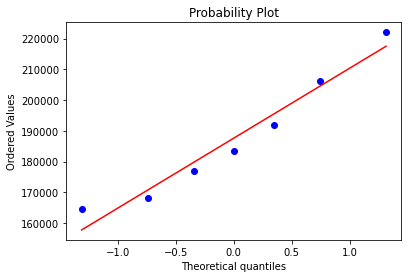

In [11]:
# 통계 검정(scipy)
from scipy import stats

# t-test: 두개 그룹의 평균값 비교
# 귀무가설: 두개 그룹의 평균값은 같다.
# 유의수준: 0.05보다 p-value가 작으면 귀무가설 기각(채택 X)

# 조건
# 각 샘플은 모집단은  normal distribution을 따른다.
# 각 샘플의 모집단 분산은 같다.



stats.ttest_ind(sub_data[:,1], sub_data[:, 2:]) # 남자, 여자의 평균은 p-value값이 0.05가 작으므로 두개의 그룹의 평균값은 다르다.

# 표준 정규분포(normal distribution) 검정, shaprio, anderson, kstest
# shaprio의 귀무가설: 샘플의 모집단은 정규분포를 따른다. 
stats.shapiro(sub_data[:, 1]) # 귀무가설 수용: 정규분포를 따름
stats.shapiro(sub_data[: ,2]) # 귀무가설 수용: 정규분포를 따름

# anderson의 귀무가설: 샘플의 모집단은 선택된 분포를 따른다. (anderson: 여러가지 분포 선택가능), 15%, 10%, 5%, 2.5%, 1%의 모든 유의수준을 다 본다.
# statistic 값이, 선택된 significance_level위 critical_value보다 크면 귀무가설 기각
stats.anderson(sub_data[:, 1]) # 0.2212가 5.0%의 critical_vlaue 0.742보다 작으므로, 귀무가설 수용.

#kstest : goodness of fit (선택된 분포와 일치하는지 검정)
#귀무가설 : 선택된 분포와 데이터가 일치함.
stats.kstest(sub_data[:, 1], stats.norm.cdf) # p-value < 0.05: 노멀 분포 따르지 않음.
#ys = stats.norm.pdf(np.linspace(-3,3,20))
#stats.kstest(ys, stats.norm.pdf)

# qqplot
_,axe = plt.subplots()
stats.probplot(sub_data[:,1], plot=axe)

In [12]:
# 분산 검정(equal vairance): bartlett, levene

# bartlett의 귀무가설 : 두개 그룹의 variance(분산)은 같다.
stats.bartlett(sub_data[:, 1], sub_data[:, 2]) # p-value > 0.05이므로 귀무가설 수용

# levene의 귀무가설 : 두개 그룹의 variance(분산)은 같다.  *샘플이 아주 심하게 normal distribuition이 아닐경우 사용. 
stats.levene(sub_data[:, 1], sub_data[:, 2]) # p-value > 0.05이므로 귀무가설 수용

LeveneResult(statistic=0.1773168571799517, pvalue=0.6811330893323229)